<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Chapter-2:-Manipulating-data" data-toc-modified-id="Chapter-2:-Manipulating-data-1">Chapter 2: Manipulating data</a></span><ul class="toc-item"><li><span><a href="#Select-columns-from-a-file---exercise" data-toc-modified-id="Select-columns-from-a-file---exercise-1.1">Select columns from a file - exercise</a></span></li><li><span><a href="#What-can't-cut-do?" data-toc-modified-id="What-can't-cut-do?-1.2">What can't cut do?</a></span></li><li><span><a href="#Select-lines-containing-specific-values" data-toc-modified-id="Select-lines-containing-specific-values-1.3">Select lines containing specific values</a></span></li><li><span><a href="#Invert-match---exercise" data-toc-modified-id="Invert-match---exercise-1.4">Invert match - exercise</a></span></li><li><span><a href="#Count-matches---exercise" data-toc-modified-id="Count-matches---exercise-1.5">Count matches - exercise</a></span></li></ul></li></ul></div>

# Chapter 2: Manipulating data

https://learn.datacamp.com/courses/introduction-to-shell

https://campus.datacamp.com/courses/introduction-to-shell/manipulating-data?ex=8

## Select columns from a file - exercise

In [2]:
ls ../data/*.csv

../data/new_hires.csv      ../data/soccer_scores_edited.csv
../data/soccer_scores.csv


In [1]:
head ../data/soccer_scores.csv

﻿Year,Winner,Winner Goals
1932,Arda,4
1933,Botev,1
1934,Cherno,5
1935,Dunav,2
1936,Cherno,4
1937,Dunav,4
1938,Beroe,5
1939,Botev,2
1940,Beroe,3


In [3]:
head ../data/new_hires.csv

﻿Country,City,Job Name,Salary
Afghanistan,Kabul,Javascript Developer,158003
Akrotiri and Dhekelia,Episkopi Cantonment,Python Developer,194640
Albania,Tirana,Data Scientist,187506
Algeria,Algiers,Javascript Developer,165451
American Samoa,Pago Pago,Python Developer,175138
Andorra,Andorra la Vella,Data Scientist,197452
Angola,Luanda,Javascript Developer,144335
Anguilla,The Valley,Python Developer,121100
Antigua and Barbuda,St. John's,Data Scientist,108816


head and tail let you select rows from a text file. If you want to select columns, you can use the command cut. It has several options (use man cut to explore them), but the most common is something like:

In [17]:
cut -d "," -f 1-2,4 ../data/new_hires.csv | head

﻿Country,City,Salary
Afghanistan,Kabul,158003
Akrotiri and Dhekelia,Episkopi Cantonment,194640
Albania,Tirana,187506
Algeria,Algiers,165451
American Samoa,Pago Pago,175138
Andorra,Andorra la Vella,197452
Angola,Luanda,144335
Anguilla,The Valley,121100
Antigua and Barbuda,St. John's,108816
cut: write error: Broken pipe


... which means "select columns 1 through 2 and columns 4, using comma as the separator". 

`cut` uses `-f` (meaning "fields") to specify columns and `-d` (meaning "delimiter") to specify the separator. You need to specify the latter because some files may use spaces, tabs, or colons to separate columns.

In [ ]:
Adding a space after the flag is good style, but not compulsory. So, eithout the space also works:

In [18]:
cut -d,  -f1-2,4 ../data/new_hires.csv | head

﻿Country,City,Salary
Afghanistan,Kabul,158003
Akrotiri and Dhekelia,Episkopi Cantonment,194640
Albania,Tirana,187506
Algeria,Algiers,165451
American Samoa,Pago Pago,175138
Andorra,Andorra la Vella,197452
Angola,Luanda,144335
Anguilla,The Valley,121100
Antigua and Barbuda,St. John's,108816
cut: write error: Broken pipe


If I only wanted field number 1:

In [19]:
cut -d, -f1 ../data/new_hires.csv | head

﻿Country
Afghanistan
Akrotiri and Dhekelia
Albania
Algeria
American Samoa
Andorra
Angola
Anguilla
Antigua and Barbuda


## What can't cut do?
`cut` is a simple-minded command. In particular, it doesn't understand quoted strings. If, for example, your file is:

In [20]:
head ../data/everyone.csv

Name,Age
"Johel,Ranjit",28
"Sharma,Rupinder",26

In [21]:
# I want the second field, Age
cut -f 2 -d , ../data/everyone.csv

Age
Ranjit"
Rupinder"


Not what I wanted ...

Rather than everyone's age, because it will think the comma between last and first names is a column separator.

In [24]:
cat ../data/fst.txt

first:second:third:

In [23]:
cut -d : -f 2-4 ../data/fst.txt

second:third:


The trailing colon creates an empty fourth field.

## Select lines containing specific values

head and tail select rows, cut selects columns, and grep selects lines according to what they contain. 

In its simplest form, grep takes a piece of text followed by one or more filenames and prints all of the lines in those files that contain that text. 

For example, 

`grep bicuspid seasonal/winter.csv` prints lines from winter.csv that contain "bicuspid".

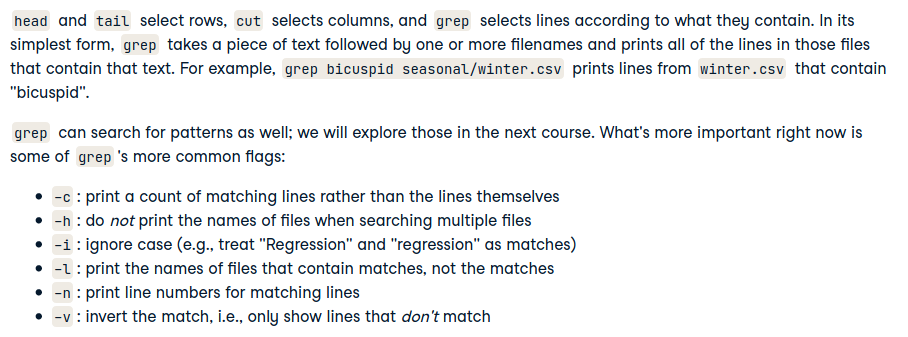

## Invert match - exercise
Invert the match to find all of the lines that don't contain the word molar in seasonal/spring.csv, and show their line numbers. Remember, it's considered good style to put all of the flags before other values like filenames or the search term "molar".

In [26]:
grep -nv "Python Developer" ../data/new_hires.csv | head

1:﻿Country,City,Job Name,Salary
2:Afghanistan,Kabul,Javascript Developer,158003
4:Albania,Tirana,Data Scientist,187506
5:Algeria,Algiers,Javascript Developer,165451
7:Andorra,Andorra la Vella,Data Scientist,197452
8:Angola,Luanda,Javascript Developer,144335
10:Antigua and Barbuda,St. John's,Data Scientist,108816
11:Argentina,Buenos Aires,Javascript Developer,170031
13:Aruba,Oranjestad,Data Scientist,117599
14:Ascension Island,Georgetown,Javascript Developer,136959
grep: write error: Broken pipe


## Count matches - exercise
Count how many lines contain the word incisor in autumn.csv and winter.csv combined. (Again, run a single command from your home directory.)

In [ ]:
grep -c incisor seasonal/autumn.csv seasonal/winter.csv